In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, confusion_matrix, recall_score, fbeta_score, make_scorer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## LATAR BELAKANG
Salah satu bank mempunyai sebuah produk deposito berjangka yang bisa di tawarkan kepada konsumen sebagai produk investasi.
Dari bank tersebut ada sebuah data yang menunjukan beberapa kolom yang berkaitan dengan penawaran produk deposito berjangka.
Dalam data tersebut kita kan mencari apakah sebuah fitur atau kolom data tersebut berpengaruh terhadap penjualan produk deposito berjangka yang di punyai bank tersebut.





## LOAD DATA

In [485]:
df=pd.read_csv('data_bank_marketing_campaign.csv')
display(df.head(),df.tail())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


### INFORMASI ATRIBUT

| Atribute | Data Type | Description|
| --- | --- | --- |
| Age | Numeric | Umur |
| Job | Kategorikal | Tipe Pekerjaan |
| Balance | Numeric | Saldo yang ada |
| Housing | Kategorikal | Memiliki pinjaman perumahan |
| Loan | Kategorikal | Memiliki pinjaman pribadi |
| Contact | Kategorikal | Tipe komunikasi yang digunakan |
| Month | Kategorikal | komunikasi terakhir berdasarkan bulan |
| Campaign | Numeric | Jumlah Penawaran yang dilakukan |
| Pdays | Numeric | Jumlah hari setelah terakhir menghubungi |
| Poutcome | Kategorikal | Hasil dari penawaran yang dilakukan |
| Deposit | Kategorikal | Apakah sudah berlanggan deposito berjangka atau belum |

In [486]:
# Melihat jumlah baris, kolom dan tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [487]:
# Melihat penjelasan dari data numerikal
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [488]:
# # Melihat penjelasan dari data kategorikal
df.describe(include=['O'])

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


In [489]:
# Melihat apakah ada data yg kosong
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [490]:
# Melihat data unik dan jumlah nya di tiap kolom
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


In [491]:
# Pada kolom 'poutcome' nilai 'unknown' di masukan pada nilai 'other' agar mudah dimengerti 
df['poutcome'] = df['poutcome'].replace('unknown', 'other', regex=True)

In [492]:
df['poutcome'].unique()

array(['other', 'failure', 'success'], dtype=object)

In [493]:
# Cek data duplikat
df[df.duplicated(keep=False)].sort_values(['age','job','balance','housing','loan','contact','month','campaign','pdays','poutcome','deposit'])

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2486,30,blue-collar,239,yes,no,unknown,may,1,-1,other,yes
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,other,yes
1468,34,management,0,no,no,cellular,aug,2,-1,other,no
5905,34,management,0,no,no,cellular,aug,2,-1,other,no
223,38,technician,0,no,no,cellular,aug,2,-1,other,no
5681,38,technician,0,no,no,cellular,aug,2,-1,other,no
1381,39,technician,0,yes,no,unknown,may,1,-1,other,no
5609,39,technician,0,yes,no,unknown,may,1,-1,other,no
330,40,blue-collar,0,yes,no,unknown,may,2,-1,other,no
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,other,no


In [494]:
# Jumlah Baris dan kolom sebelum menghapus duplikat
df.shape

(7813, 11)

In [495]:
# Menghapus data Duplikat
df = df.drop_duplicates()
df.shape

(7805, 11)

## DATA ANALISIS

### SIMPLE EDA

In [496]:
# Categorical Feature
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (feature not in ['deposit']))]
cat_features

['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

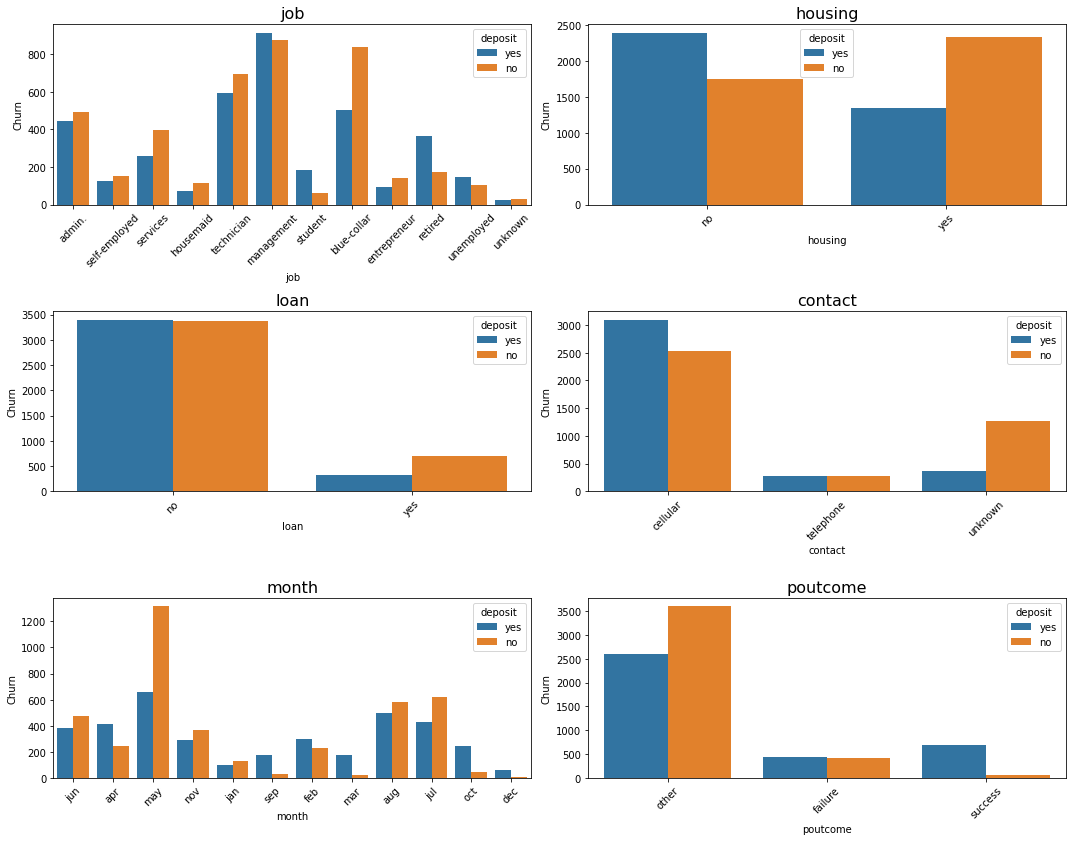

In [497]:
plt.figure(figsize=(15, 15), facecolor='white')
plotnumber = 1

for feature in cat_features:
   
    ax = plt.subplot(4, 2, plotnumber)
    
    sns.countplot(hue = 'deposit', x = feature, data = df)
    
    plt.ylabel('Churn')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.title(feature, fontsize=16)
    plt.tight_layout();
    
    plotnumber += 1

Kesimpulan :
- beberapa tipe pekerjaan seperti : admin, self-employed, servised, housemaid, technician, blue-collar, entrepreneur, serta unknown lebih banyak memilih untuk tidak berlangganan deposito. Terlebih untuk pekerjaan blue-collar yang terlihat berbeda signifikan di banding pekerjaan yang lain.
- dan utnuk tipe pekerjaan seperti : management, student, retired, dan unemployed lebih banyak memilih untuk berlangganan deposito. Terlebih untuk tipe pekerjaan retired yang terlihat lebih banyak di banding pekerjaan lain.
- Untuk yang memiliki pinjaman untuk perumahan terlihat perbandingan nya hampir sama dengan yang tidak meiliki pinjaman perumahan untuk berlangganan deposito.
- Untuk yang tidak memiliki pinjaman pribadi lebih banyak untuk berlanganan deposito dibanding yang mempunyai pinjaman pribadi
- Untuk yang mempunyai kontak telepon selular lebih berkesempatan dan memang lebih banyak yang berlangganan deposito
- Pada bulan mei terlihat cukup signifikan yang berlanggana deposito
- Dari data di atas terlihat yang tidak berlangganan lebih banyak di banding dengan yang berlangganan, dan itu lebih banyak di other

In [498]:
# Numerical Feature
num_features = [feature for feature in df.columns if (df[feature].dtypes != 'O')]
num_features

['age', 'balance', 'campaign', 'pdays']

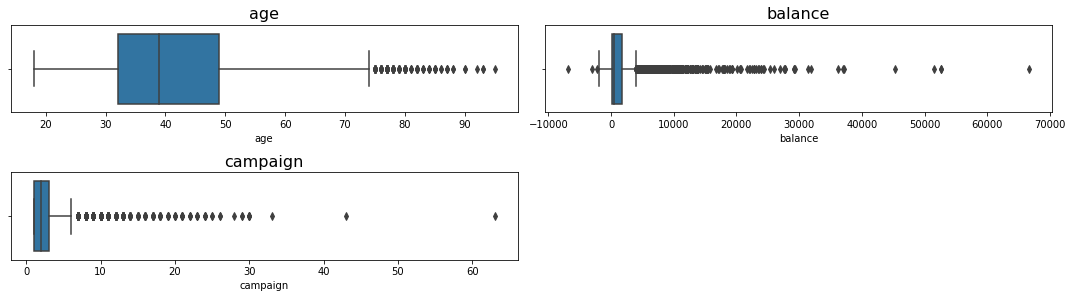

In [499]:
# boxplot
plt.figure(figsize=(15, 12), facecolor='white')
plotnumber = 1
    
for feature in num_features[:-1]:
    ax = plt.subplot(6,2, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

Kesimpulan :
- Untuk pesebaran umur paling banyak ada di anata 30 sampai 50 tahun, dan yang paling tua ada sampai usia di atas 90 tahun.
- Pada kolom 'balance' adata data yang minus artinya data ini masih memiliki tunggakan, kredit atau tagihan lain yang belum dibayar. dan untuk saldo yang paling besar ada di sekitar 60 ribu.
- Untuk penawaran yang dilakukan paling banyak di bawah 10 kali dan ada data yang penawaran nya sampai 6o kali lebuh

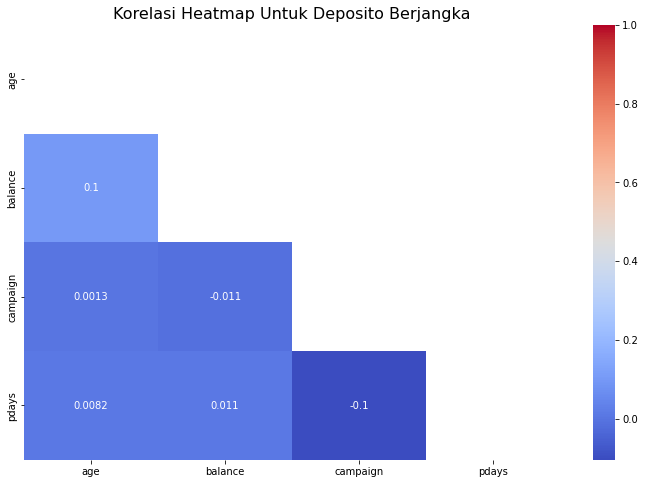

In [500]:
mask = np.zeros_like(df.corr()) 
mask[np.triu_indices_from(mask)]=True 

plt.figure(figsize=(12, 8))
plt.title('Korelasi Heatmap Untuk Deposito Berjangka', size=16)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, mask=mask, vmax=1);

Kesimpulan :
- Dari tabel di atas dapat di lihat bahwa campaign atau penawaran yang dilakukan berpengaruh atau sangat berkorelasi, sedangkan age dan pdays tidak.

In [501]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,other,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,other,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,other,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,other,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,other,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,other,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,other,no


In [502]:
df['deposit'].replace(['no','yes'],[0,1],inplace=True)
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,other,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,other,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,other,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,other,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,other,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,unknown,179,no,no,cellular,aug,8,-1,other,0
7811,31,admin.,54,yes,no,cellular,nov,1,-1,other,0


## Data splitting

In [503]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']

In [504]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    stratify=y,
    test_size=0.2,
    random_state=0
)

## Data preprocessing

In [505]:
# Transformer scheme
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False, drop='first'), ['job','housing','loan','contact','month','poutcome'])
], remainder='passthrough')

In [506]:
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

## Model benchmark

In [507]:
# DecsionTree
tree = DecisionTreeClassifier(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
ada = AdaBoostClassifier(tree, random_state=0)

# Gradientboost
gbc = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgbc = XGBClassifier(random_state=0, verbosity=0)

In [508]:
# Define imbalanced treatment method
models = [tree, rf, ada, gbc, xgbc]
score = []
nilai_mean = []
nilai_std = []



for i in models:

    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('transformer', transformer),
        ('scaler', RobustScaler()),
        ('balancing', smote),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=skfold, 
        scoring='f1', 
        error_score='raise'
        )

    print(model_cv, i)

    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

[0.5962326  0.61676159 0.57819104 0.61186441 0.61940928] DecisionTreeClassifier(random_state=0)
[0.67530225 0.69550173 0.6443662  0.68430335 0.67321429] RandomForestClassifier(random_state=0)
[0.6025974  0.63679245 0.57070707 0.65151515 0.60579456] AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0)
[0.67954346 0.71376812 0.66001813 0.68463612 0.67399267] GradientBoostingClassifier(random_state=0)
[0.67654752 0.68863833 0.6619594  0.65777778 0.65186501] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
        

In [509]:
pd.DataFrame({
    'model':['tree', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':nilai_mean,
    'std':nilai_std
})

,model,mean,std
0,tree,0.604492,0.015410
1,rf,0.674538,0.017015
2,ada,0.613481,0.028274
3,gbc,0.682392,0.017713
4,xgbc,0.667358,0.013403


Model RandomForest dan GradientBoost dipilih menjadi 2 model paling optimal karena memiliki nilai recall rata-rata paling tinggi.

## Hyperparameter Tuning

### Random Forest

In [510]:
# kedalaman pohon
max_depth = list(np.arange(1,10))


# jumlah pohon
n_estimators = list(np.arange(50,500))



# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,10))

# Hyperparameter space
hyperparam_space = {
    'balancing':[smote, rus, ros, None],
    'model__max_depth':max_depth , 

    'model__n_estimators':n_estimators,
   
    'model__max_features':max_features
}

In [511]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Benchmark model 1
rf = RandomForestClassifier(random_state=0)


# Create the algorithm chains
estimator_rf = Pipeline([
    ('tansformer', transformer),
    ('scaler', RobustScaler()),
    ('balancing', smote), 
    ('model', rf)
    ])

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space, 
    cv = skf, 
    scoring = 'f1', 
    n_jobs = -1, 
    random_state=0,
    n_iter=100
)

In [512]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'poutcome'])])),
                                             ('scaler', RobustScaler()),
                                             ('balancing',
                                              SMOTE(random_state=0)),
                                             (...
                   param_distributions={'balancing': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'model__max_features': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...]},
                   random_state=0, scoring='f1')

In [513]:
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
91,1.372244,0.169054,0.103926,0.035083,83,8,9,RandomOverSampler(random_state=0),"{'model__n_estimators': 83, 'model__max_features': 8, 'model__max_depth': 9, 'balancing': RandomOverSampler(random_state=0)}",0.684397,0.708861,0.663620,0.673232,0.680184,0.682059,0.015134,1
23,2.087084,0.091409,0.121912,0.029344,104,8,9,RandomOverSampler(random_state=0),"{'model__n_estimators': 104, 'model__max_features': 8, 'model__max_depth': 9, 'balancing': RandomOverSampler(random_state=0)}",0.686833,0.712477,0.656279,0.669651,0.683919,0.681832,0.018814,2
38,0.814442,0.174162,0.049639,0.013132,57,7,9,RandomUnderSampler(random_state=0),"{'model__n_estimators': 57, 'model__max_features': 7, 'model__max_depth': 9, 'balancing': RandomUnderSampler(random_state=0)}",0.677419,0.712853,0.670185,0.669691,0.676580,0.681346,0.016070,3
12,2.392497,0.172373,0.107948,0.025252,231,8,9,RandomOverSampler(random_state=0),"{'model__n_estimators': 231, 'model__max_features': 8, 'model__max_depth': 9, 'balancing': RandomOverSampler(random_state=0)}",0.681042,0.708029,0.659982,0.675068,0.680812,0.680987,0.015541,4
16,2.068254,0.114820,0.108157,0.014553,249,7,8,RandomUnderSampler(random_state=0),"{'model__n_estimators': 249, 'model__max_features': 7, 'model__max_depth': 8, 'balancing': RandomUnderSampler(random_state=0)}",0.681574,0.702108,0.667266,0.679750,0.673451,0.680830,0.011772,5


In [514]:
print('RF')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)


RF
Best_score: 0.6820587739106466
Best_params: {'model__n_estimators': 83, 'model__max_features': 8, 'model__max_depth': 9, 'balancing': RandomOverSampler(random_state=0)}


### Gradient Boost

In [515]:
# kedalaman pohon
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(1,100)/100)

# jumlah pohon
n_estimators = list(np.arange(50,500))

# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(2,10)/10)

# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,10))

# Hyperparameter space GBC
hyperparam_space_gbc = {
    'balancing':[smote, rus, ros, None],
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

In [516]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Benchmark model 1
gbc = GradientBoostingClassifier(random_state=0)

# Create the algorithm chains
estimator_gbc = Pipeline([
    ('tansformer', transformer),
    ('scaler', RobustScaler()),
    ('balancing', smote), 
    ('model', gbc)
    ])

# Hyperparameter tuning
random_gbc = RandomizedSearchCV(
    estimator_gbc, 
    param_distributions = hyperparam_space_gbc, 
    cv = skf, 
    scoring = 'f1', 
    n_jobs = -1, 
    random_state=0,
    n_iter=30
)

In [517]:
random_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'poutcome'])])),
                                             ('scaler', RobustScaler()),
                                             ('balancing',
                                              SMOTE(random_state=0)),
                                             (...
                                                                 0.17, 0.18,
                                                                 0.19, 0.2,
                                                                 0.21, 0.22,
                                                                 0.23, 0.24,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'model__max_features': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=0, scoring='f1')

In [518]:
pd.DataFrame(random_gbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,1.164621,0.113658,0.036687,0.022484,0.5,56,3,8,0.03,RandomOverSampler(random_state=0),"{'model__subsample': 0.5, 'model__n_estimators': 56, 'model__max_features': 3, 'model__max_depth': 8, 'model__learning_rate': 0.03, 'balancing': RandomOverSampler(random_state=0)}",0.673232,0.709441,0.676868,0.678636,0.678309,0.683297,0.013212,1
11,2.454753,0.065230,0.025277,0.006743,0.8,486,4,1,0.5,RandomOverSampler(random_state=0),"{'model__subsample': 0.8, 'model__n_estimators': 486, 'model__max_features': 4, 'model__max_depth': 1, 'model__learning_rate': 0.5, 'balancing': RandomOverSampler(random_state=0)}",0.682927,0.704745,0.642218,0.699376,0.675627,0.680979,0.022082,2
15,0.815710,0.119221,0.052906,0.019900,0.4,107,1,4,0.26,RandomUnderSampler(random_state=0),"{'model__subsample': 0.4, 'model__n_estimators': 107, 'model__max_features': 1, 'model__max_depth': 4, 'model__learning_rate': 0.26, 'balancing': RandomUnderSampler(random_state=0)}",0.685764,0.684022,0.660228,0.685562,0.672566,0.677629,0.009984,3
27,5.098639,0.578000,0.060819,0.014639,0.5,270,2,8,0.01,None,"{'model__subsample': 0.5, 'model__n_estimators': 270, 'model__max_features': 2, 'model__max_depth': 8, 'model__learning_rate': 0.01, 'balancing': None}",0.678439,0.684461,0.659813,0.686792,0.666031,0.675107,0.010502,4
1,1.899712,0.092906,0.056855,0.015832,0.2,188,4,6,0.08,SMOTE(random_state=0),"{'model__subsample': 0.2, 'model__n_estimators': 188, 'model__max_features': 4, 'model__max_depth': 6, 'model__learning_rate': 0.08, 'balancing': SMOTE(random_state=0)}",0.664912,0.692718,0.654960,0.669027,0.659963,0.668316,0.013082,5


In [519]:
print('GBC')
print('Best_score:', random_gbc.best_score_)
print('Best_params:', random_gbc.best_params_)

GBC
Best_score: 0.6832969617768643
Best_params: {'model__subsample': 0.5, 'model__n_estimators': 56, 'model__max_features': 3, 'model__max_depth': 8, 'model__learning_rate': 0.03, 'balancing': RandomOverSampler(random_state=0)}


## Performance in Test Set


### Before Hyperparameter Tuning

In [520]:
models={
    'RandomForest' : RandomForestClassifier(random_state=0),
    'GradientBoosting': GradientBoostingClassifier(random_state=0),
}

score=[]

for i in models:

    model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote),
        ('model', models[i])
    ])

    # fitting
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_test)

    # recall score
    score.append([fbeta_score(y_test, y_pred, beta=2)])

score_before_tuning = pd.DataFrame(score, columns=['F1'], index = models.keys())
score_before_tuning

,F1
RandomForest,0.653836
GradientBoosting,0.635274


### After Hyperparameter Tuning

In [521]:
# best model
rf_tuning = random_rf.best_estimator_

# fitting
rf_tuning.fit(X_train, y_train)

# predict
y_pred_rf_tuning = rf_tuning.predict(X_test)

# recall score
f1_rf_tuning = fbeta_score(y_test, y_pred_rf_tuning, beta=2)
f1_rf_tuning

0.6388274336283186

In [522]:
# best model
gbc_tuning = random_gbc.best_estimator_

# fitting
gbc_tuning.fit(X_train, y_train)

# predict
y_pred_gbc_tuning = gbc_tuning.predict(X_test)

# recall score
f1_gbc_tuning = fbeta_score(y_test, y_pred_gbc_tuning, beta=2)
f1_gbc_tuning

0.6375654089782428

In [523]:
score_list = [f1_rf_tuning, f1_gbc_tuning]

models = ['RandomForest','GradientBoosting']

score_after_tuning = pd.DataFrame({
    'Model': models,
    'F1': score_list
})

score_after_tuning

,Model,F1
0,RandomForest,0.638827
1,GradientBoosting,0.637565


## Comparison (Test Set)

In [524]:
score_before_tuning

,F1
RandomForest,0.653836
GradientBoosting,0.635274


In [525]:
score_after_tuning

,Model,F1
0,RandomForest,0.638827
1,GradientBoosting,0.637565


In [526]:
print('RandomForestClassifier')
print(classification_report(y_test, y_pred_rf_tuning))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       815
           1       0.73      0.62      0.67       746

    accuracy                           0.71      1561
   macro avg       0.71      0.71      0.71      1561
weighted avg       0.71      0.71      0.71      1561



In [527]:
print('GradientBoostingClassifier')
print(classification_report(y_test, y_pred_gbc_tuning))

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       815
           1       0.72      0.62      0.66       746

    accuracy                           0.70      1561
   macro avg       0.70      0.70      0.70      1561
weighted avg       0.70      0.70      0.70      1561



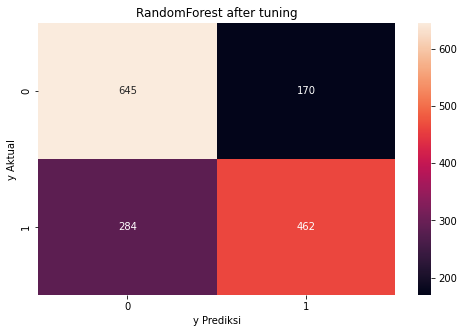

In [528]:
# RandomForest after tuning
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuning), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('RandomForest after tuning');

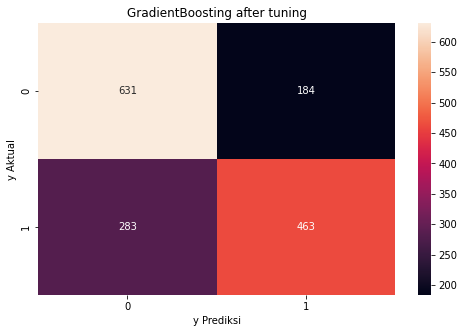

In [529]:
# GradientBoost after tuning
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_tuning), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('GradientBoosting after tuning');

In [530]:
print(score_before_tuning.iloc[0])
print(score_after_tuning.iloc[0])

F1    0.653836
Name: RandomForest, dtype: float64
Model    RandomForest
F1       0.638827    
Name: 0, dtype: object


In [531]:
print(score_before_tuning.iloc[1])
print(score_after_tuning.iloc[1])

F1    0.635274
Name: GradientBoosting, dtype: float64
Model    GradientBoosting
F1       0.637565        
Name: 1, dtype: object


## Kesimpulan 
---
Random Forest

   - Train Set:
      - Before tuning: 0.67
      - After tuning: 0.68

   - Test Set:
      - Before tuning: 0.65
      - After tuning: 0.63

---
Gradient Boost

   - Train Set:
      - Before tuning: 0.68
      - After tuning: 0.68

   - Test Set:
      - Before tuning: 0.63
      - After tuning: 0.63

---

Hyperparameter tuning berhasil meningkatkan F1 pada test set dari model dengan Random Forest sebesar 0.01. Berbeda denga  Gradient Boost yang stabil pada train set dan tes set.

## Feature Importance

In [532]:
rf_tuning

Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('scaler', RobustScaler()),
                ('balancing', RandomOverSampler(random_state=0)),
                ('model',
                 RandomForestClassifier(max_depth=9, max_features=8,
                                        n_estimators=83, random_state=0))])

In [533]:
rf_tuning['model'].feature_importances_

array([0.00991566, 0.00400625, 0.00372107, 0.00652111, 0.00534617,
       0.00289932, 0.00364546, 0.00552065, 0.00573568, 0.00349141,
       0.00177565, 0.07813201, 0.0220392 , 0.0090999 , 0.13755302,
       0.01705237, 0.00129434, 0.00422331, 0.00617886, 0.01258274,
       0.02513651, 0.02574187, 0.02408194, 0.01102101, 0.02051842,
       0.0118452 , 0.04173892, 0.15034064, 0.09772157, 0.1045407 ,
       0.05136595, 0.09521309])

In [534]:
feat_cat = list(transformer.transformers_[0][1].get_feature_names_out())
feat_num =list(X_train.columns[transformer.transformers_[1][2]])

feat = feat_cat + feat_num

In [535]:
imp = pd.DataFrame({
    'feature':feat,
    'importance':rf_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

imp

,feature,importance
27,poutcome_success,0.150341
14,contact_unknown,0.137553
29,balance,0.104541
28,age,0.097722
31,pdays,0.095213
11,housing_yes,0.078132
30,campaign,0.051366
26,poutcome_other,0.041739
21,month_mar,0.025742
20,month_jun,0.025137


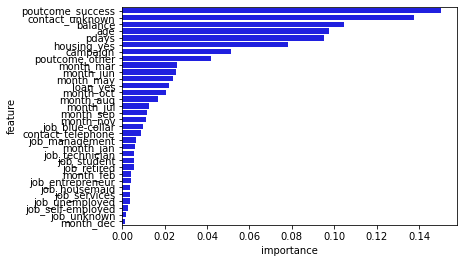

In [536]:
sns.barplot(data=imp, y='feature', x='importance', color='b');

## Kesimpulan :
- 'poutcome' menjadi fitur terpenting pada data di atas yang berpengaruh terhadap di terimanya penawaran yang dilakukan agar membeli produk deposito berjangka.
- Penawaran yang dilakukan mungkin menggunakan metode offline atau secara tatap muka menawarkan kepada konsumen, dengan cara membuka stand di pusat keramaian untuk menawarkan prodak deposito berjangka tersebut. Itu terlihat dengan posisi 'contact yang berada di bawah 'poutcome'
- Disusul dengan fitur 'contact' dan 'balance' di posisi berikutnya, yang memang 'contact penting untuk sebuah bank menawarkan sebuah produk deposito berjangka kepada konsumen. Serta 'balance' yang memang di butuhkan untuk bisa menggunakan sebuah produk deposito berjangka yang ada di sebuah bank


## Rekomendasi :
Untuk mendapatkan kosumen membeli produk deposito berjangka memang bisa dilakukan dengan berbagai cara baik itu secara online via telp atau offline dengan menawarkan secara langsung kepada konsumen. Tetapi berdasarkan data di atas dapat dilihat bahwa pertubuhan konsumen untuk produk deposito berjangka dapat di capai dengan metode offline. Untuk itu perusahaan sebaiknya membuat sebuah stand atau titik seorang sales untuk bisa menawarkan produknya sehingga kosumen bisa lebih mengetahui produk tersebut dengan bertanya langsung dengan seorang sales tersebut.

## Save Model : Pickle

In [537]:
# Save Model
import pickle

# best model
rftuning = random_rf.best_estimator_

rf_tuning.fit(X, y)

pickle.dump(rf_tuning, open('Model_RandomForest.sav', 'wb'))